In [49]:
import pandas as pd 
import numpy as np
from xgboost import XGBClassifier
import shap
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [50]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [51]:
train = pd.read_csv('../../data/train_concat.csv')
valid = pd.read_csv('../../data/valid_concat.csv')
test = pd.read_csv('../../data/test_concat.csv')

ex1 = pd.read_csv('../../data2_2024/Kidney biopsy_External_Final_신촌.csv', encoding='cp949')

In [52]:
ex_copy = ex1[['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb',
       'bun', 'cr', 'eGFR', 'blood_dip', 'protein_dip', 'acr_urine',
       'pcr_urine', 'glu', 'glu_urine', 'esterase_urine', 'RBC', 'WBC']].copy()

In [53]:
print(train.columns)
print(valid.columns)
print(test.columns)

print(ex1.columns)

Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC_re', 'WBC_re',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'group', 'target'],
      dtype='object')
Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC_re', 'WBC_re',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'group', 'target'],
      dtype='object')
Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC_re', 'WBC_re',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'group', 'target'],
      dtype='object')
Index(['FINAL', '(실명)등록번호', '연구등록번호', '외부', '병리작성일', '서식키'

In [54]:
train.columns=['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'group', 'target']

valid.columns = ['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'group', 'target']
test.columns = ['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'group', 'target']

In [55]:
print(train.shape)
print(valid.shape)
print(test.shape)

(18513, 25)
(1233, 25)
(4938, 25)


In [56]:
train['group'] = train["group"].astype("category")
train.info()
valid['group'] = valid["group"].astype("category")
test['group'] = test["group"].astype("category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18513 entries, 0 to 18512
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              18513 non-null  float64 
 1   sex              18513 non-null  int64   
 2   HTN              18513 non-null  int64   
 3   DM               18513 non-null  int64   
 4   plt              17208 non-null  float64 
 5   tpro             18513 non-null  float64 
 6   alb              18513 non-null  float64 
 7   bun              18513 non-null  float64 
 8   cr               18513 non-null  float64 
 9   eGFR             18513 non-null  float64 
 10  blood_dip        18513 non-null  float64 
 11  protein_dip      18513 non-null  float64 
 12  acr_urine        13761 non-null  float64 
 13  pcr_urine        18513 non-null  float64 
 14  glu              18510 non-null  float64 
 15  glu_urine        18513 non-null  float64 
 16  esterase_urine   18513 non-null  float64

In [57]:
# train_dum = pd.get_dummies(train, columns = ['group'],drop_first=True).copy()
# valid_dum = pd.get_dummies(valid, columns = ['group'],drop_first=True).copy()
# test_dum = pd.get_dummies(test, columns = ['group'],drop_first=True).copy()

### EDA

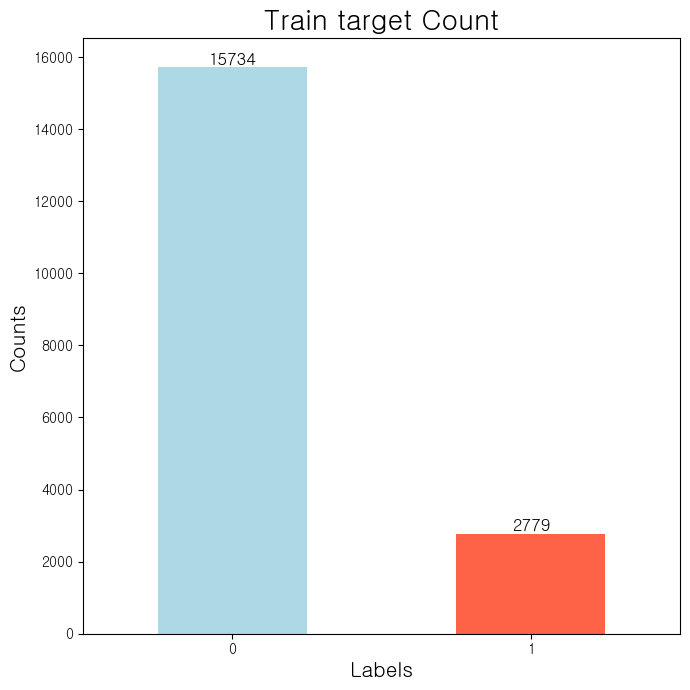

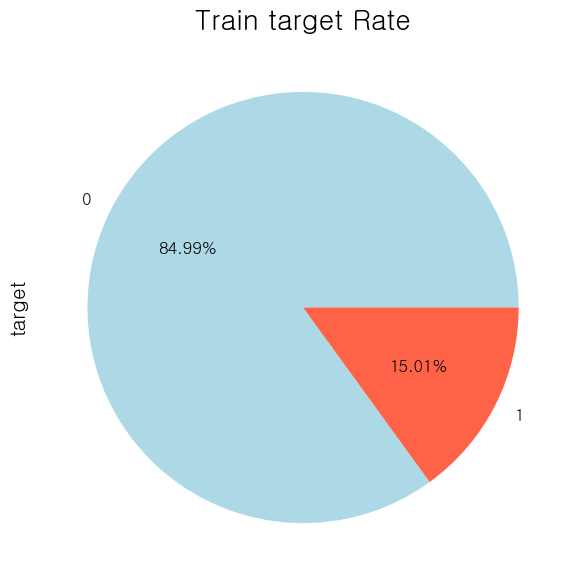

In [58]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

plt.title('Train target Count', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Labels', fontsize=15)

# Get the value counts of 'target' and plot as a bar plot
train['target'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'tomato'])

# Annotate the bars with their values
for index, value in enumerate(train['target'].value_counts().sort_index()):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # Keep the x-labels horizontal for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

plt.figure(figsize=(7,7))

plt.title('Train target Rate' , fontsize=20)

plt.ylabel('labels' , fontsize=15)

train['target'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'] , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})

plt.show()

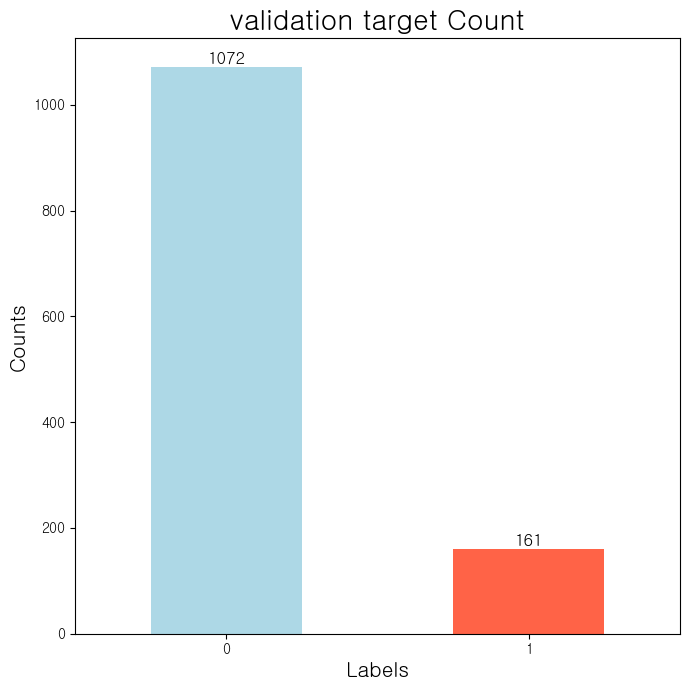

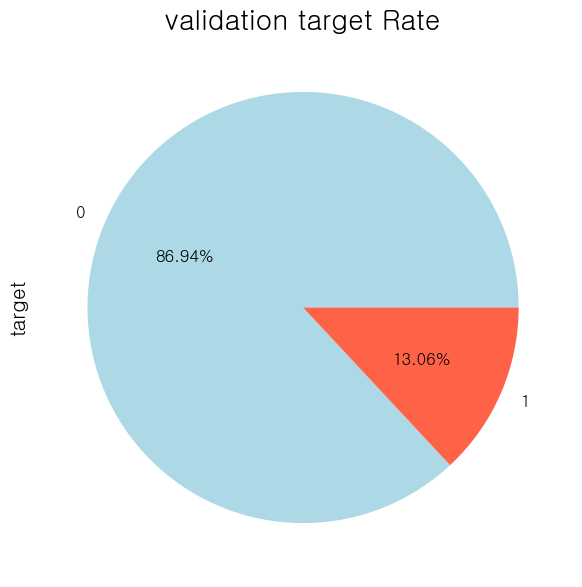

In [59]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

plt.title('validation target Count', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Labels', fontsize=15)

valid['target'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'tomato'])

# Annotate the bars with their values
for index, value in enumerate(valid['target'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # Keep the x-labels horizontal for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

plt.figure(figsize=(7,7))

plt.title('validation target Rate' , fontsize=20)

plt.ylabel('labels' , fontsize=15)

valid['target'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'] , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})

plt.show()

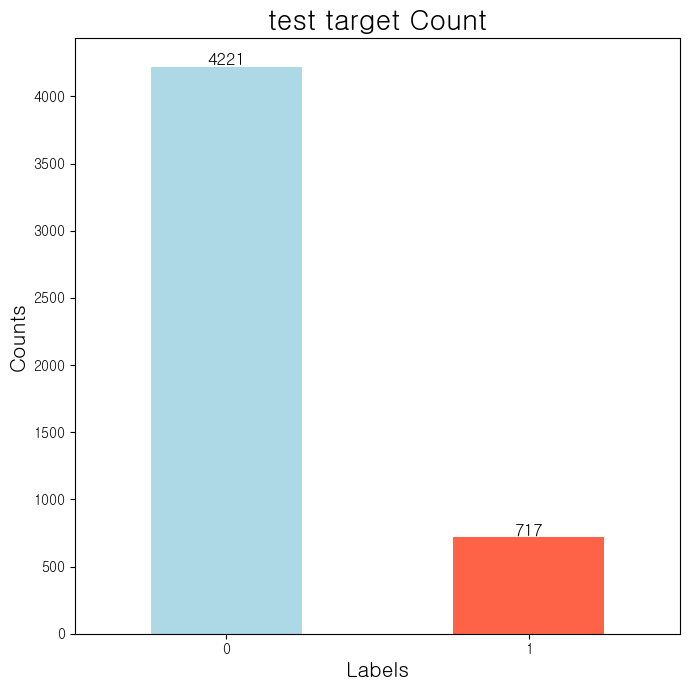

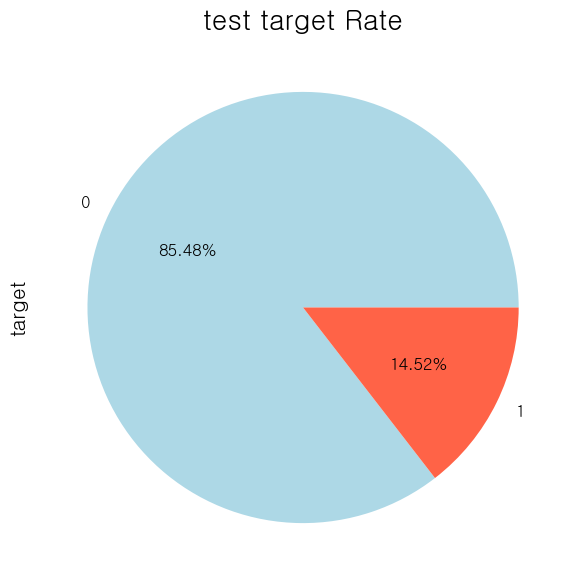

In [60]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

plt.title('test target Count', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Labels', fontsize=15)

test['target'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'tomato'])

# Annotate the bars with their values
for index, value in enumerate(test['target'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # Keep the x-labels horizontal for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

plt.figure(figsize=(7,7))

plt.title('test target Rate' , fontsize=20)

plt.ylabel('labels' , fontsize=15)

test['target'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'] , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})

plt.show()

## Modeling

In [61]:
xgb = XGBClassifier(random_state = 2023, n_jobs=-1)

In [62]:
X_train = train.drop(['target', 'RBC_binary', 'WBC_binary','dysmorphism', 'esterase_binary','group'], axis=1).copy()
y_train = train['target'].copy()

X_valid = valid.drop(['target', 'RBC_binary', 'WBC_binary', 'dysmorphism','esterase_binary','group'], axis=1).copy()
y_valid = valid['target'].copy()

X_test = test.drop(['target', 'RBC_binary', 'WBC_binary','dysmorphism', 'esterase_binary','group'], axis=1).copy()
y_test = test['target'].copy()

In [63]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=2023, ...)

In [64]:
y_valid

0       0
1       0
2       0
3       1
4       0
       ..
1228    1
1229    0
1230    1
1231    0
1232    0
Name: target, Length: 1233, dtype: int64

### Shap

In [65]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
# # Create a KernelExplainer
# explainer = shap.KernelExplainer(model=xgb.predict_proba, data=X_train)

# # Calculate SHAP values
# shap_values = explainer.shap_values(X_test)

# # Visualize the SHAP values or use them for further analysis
# shap.summary_plot(shap_values, X_test)

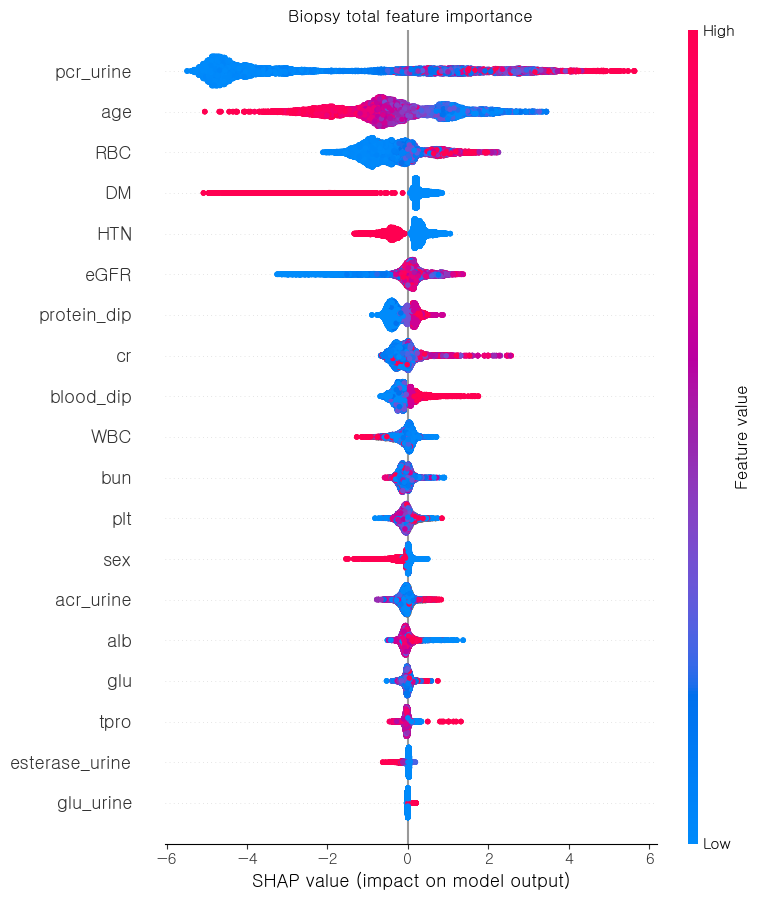

In [66]:
plt.figure(figsize=[10,10])

plt.title('Biopsy total feature importance')
shap.summary_plot(shap_values, X_train)

plt.show()

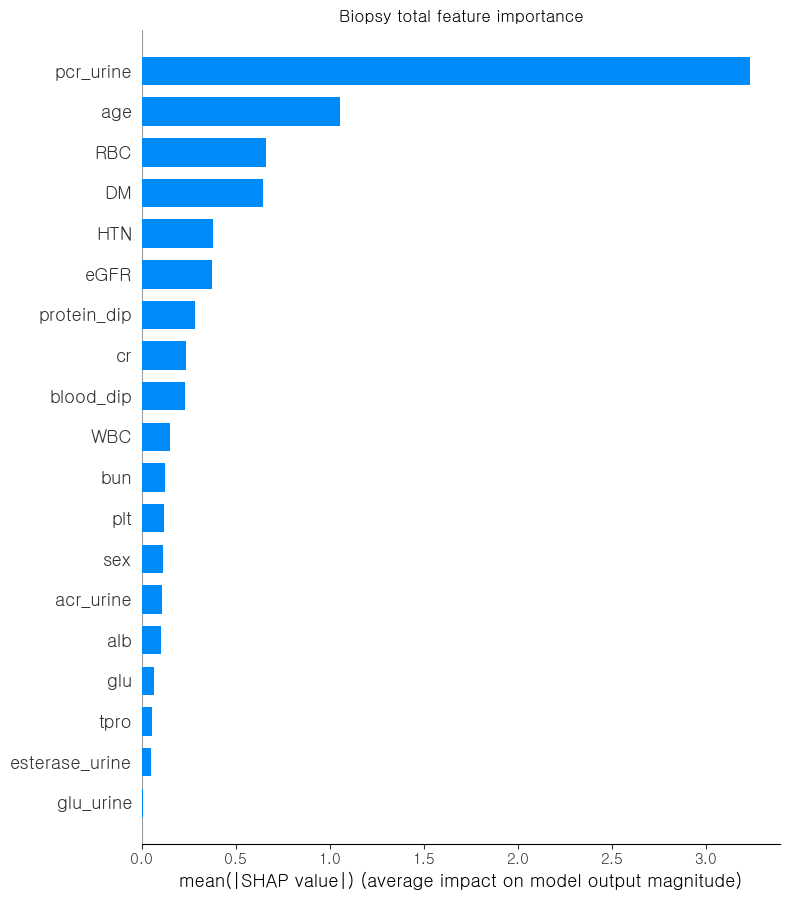

In [67]:
plt.figure(figsize=[10,10])

plt.title('Biopsy total feature importance')
shap.summary_plot(shap_values, X_train, plot_type="bar")
plt.show()

In [68]:
train_pred = xgb.predict(X_train)
train_pred_prob = xgb.predict_proba(X_train)

In [69]:
train_pred_prob

array([[1.7099100e-01, 8.2900900e-01],
       [9.9902755e-01, 9.7246194e-04],
       [9.9989092e-01, 1.0908398e-04],
       ...,
       [9.9595565e-01, 4.0443782e-03],
       [1.0638213e-01, 8.9361787e-01],
       [3.1146878e-01, 6.8853122e-01]], dtype=float32)

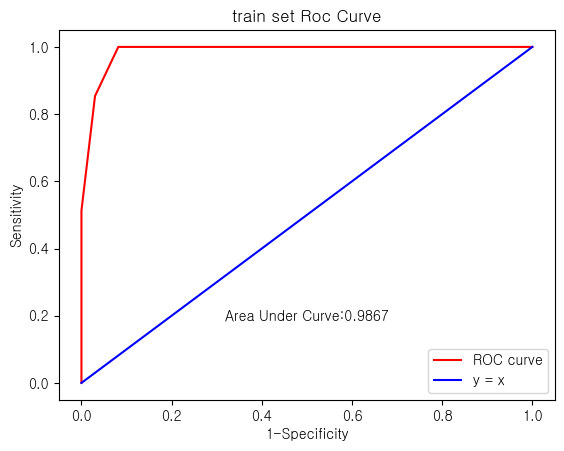

In [70]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(np.array(y_train), train_pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(y_train), train_pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('train set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [71]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     15734
           1       0.83      0.85      0.84      2779

    accuracy                           0.95     18513
   macro avg       0.90      0.91      0.91     18513
weighted avg       0.95      0.95      0.95     18513



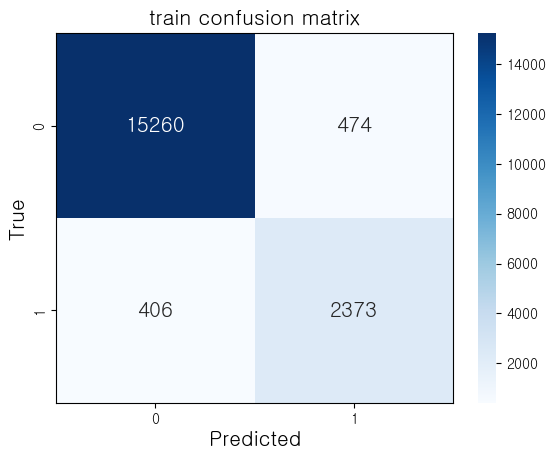

In [72]:
cm = confusion_matrix(y_train, train_pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('train confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

### Validation

In [73]:
pred = xgb.predict(X_valid)
print(pd.DataFrame(pred).head())

pred_prob = xgb.predict_proba(X_valid)
print(pd.DataFrame(pred_prob[:,1]).head())

   0
0  0
1  0
2  0
3  1
4  0
          0
0  0.000099
1  0.034833
2  0.000003
3  0.757789
4  0.000347


In [74]:
pred_prob.shape

(1233, 2)

In [75]:
y_valid

0       0
1       0
2       0
3       1
4       0
       ..
1228    1
1229    0
1230    1
1231    0
1232    0
Name: target, Length: 1233, dtype: int64

In [76]:
accuracy = accuracy_score(y_valid, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.19%


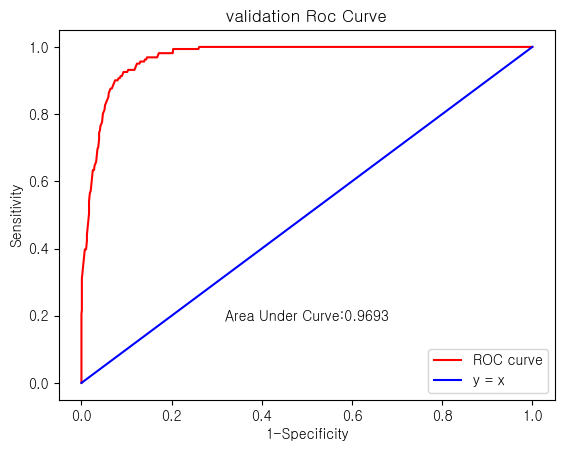

In [77]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(np.array(y_valid), pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(y_valid), pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('validation Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [78]:
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1072
           1       0.72      0.79      0.75       161

    accuracy                           0.93      1233
   macro avg       0.84      0.87      0.86      1233
weighted avg       0.94      0.93      0.93      1233



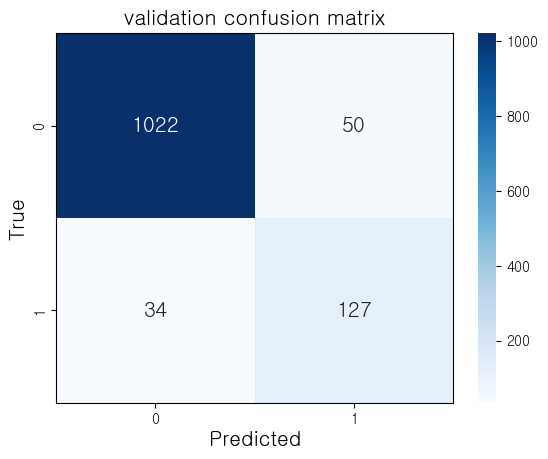

In [79]:
cm = confusion_matrix(y_valid, pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('validation confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

### test

In [80]:
test_pred = xgb.predict(X_test)
test_pred_prob = xgb.predict_proba(X_test)

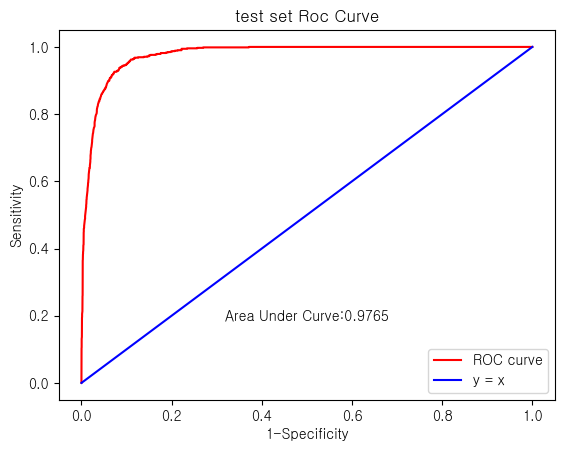

In [81]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(np.array(y_test), test_pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(y_test), test_pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('test set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [82]:
accuracy = accuracy_score(y_test, test_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.25%


In [83]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4221
           1       0.80      0.80      0.80       717

    accuracy                           0.94      4938
   macro avg       0.88      0.88      0.88      4938
weighted avg       0.94      0.94      0.94      4938



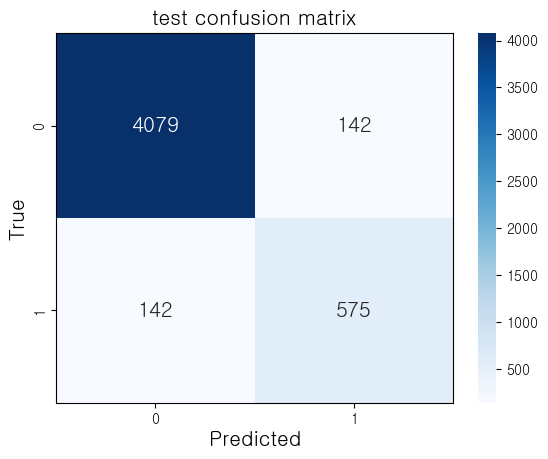

In [84]:
cm = confusion_matrix(y_test, test_pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('test confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

### 신촌 데이터셋 보기_answer1

In [85]:
ex_pred = xgb.predict(ex_copy)
ex_pred_prob = xgb.predict_proba(ex_copy)

In [86]:
ex1['Answer'].value_counts()

1    587
0    173
Name: Answer, dtype: int64

In [87]:
pd.Series(ex_pred).value_counts()

0    454
1    306
dtype: int64

In [88]:
ex1['answer1'] = ex1['pcr_urine'].apply(lambda x: 1 if 1 <= x else 0 )

In [89]:
ex1[['answer1', 'pcr_urine']]

,answer1,pcr_urine
0,1,3.31
1,1,1.17
2,1,1.55
3,1,1.55
4,1,7.55
...,...,...
755,0,0.07
756,1,497.90
757,1,497.90
758,0,0.06


In [90]:
print(ex1.answer1.value_counts())
label_ratios = ex1['answer1'].value_counts() / len(ex1['answer1'])
print(label_ratios)

1    480
0    280
Name: answer1, dtype: int64
1    0.631579
0    0.368421
Name: answer1, dtype: float64


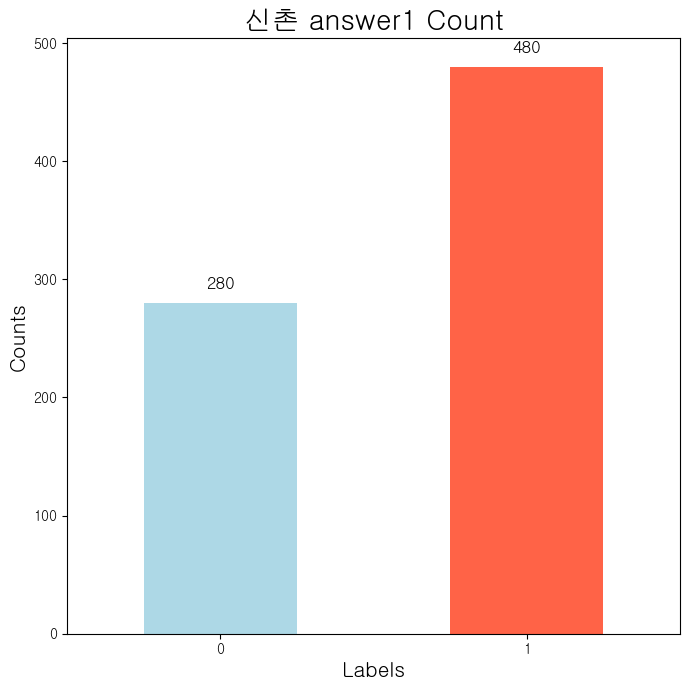

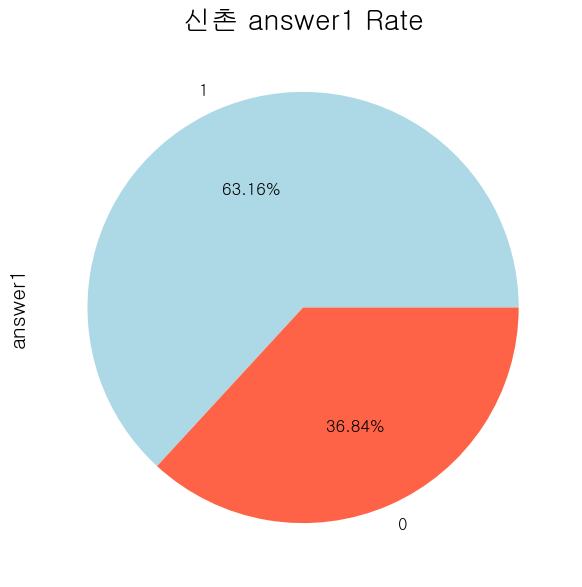

In [97]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

plt.title('신촌 answer1 Count', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Labels', fontsize=15)

# Get the value counts of 'answer1' and plot as a bar plot
ex1['answer1'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'tomato'])

# Annotate the bars with their values
for index, value in enumerate(ex1['answer1'].value_counts().sort_index()):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # Keep the x-labels horizontal for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

plt.figure(figsize=(7,7))

plt.title('신촌 answer1 Rate' , fontsize=20)

plt.ylabel('labels' , fontsize=15)

ex1['answer1'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'] , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})

plt.show()

In [91]:
print(ex_pred)
print(ex_pred_prob)

[0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1
 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1
 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0
 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0
 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 0 1 0 1 0 0 

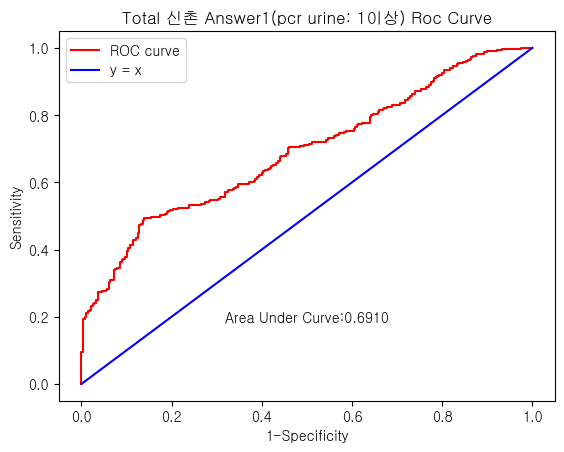

In [92]:
# roc curve, auc 신촌 set
fpr, tpr, thresholds = roc_curve(np.array(ex1['answer1']), ex_pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(ex1['answer1']), ex_pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Total 신촌 Answer1(pcr urine: 1이상) Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [93]:
print(classification_report(ex1['answer1'], ex_pred))

              precision    recall  f1-score   support

           0       0.49      0.80      0.61       280
           1       0.81      0.52      0.63       480

    accuracy                           0.62       760
   macro avg       0.65      0.66      0.62       760
weighted avg       0.69      0.62      0.62       760



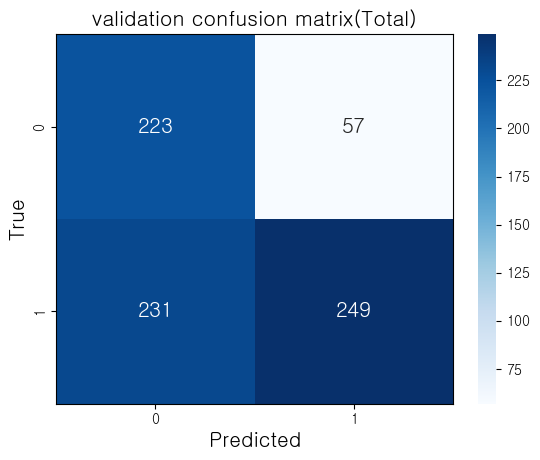

In [96]:
cm = confusion_matrix(ex1['answer1'], ex_pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('validation confusion matrix(Total)', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()